<a href="https://colab.research.google.com/github/toobask/introtoAI1/blob/main/IntroToAI_701_CourseWork_Amua_et_Tooba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition import  PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Exploratory Data Analysis

In [2]:
#load diabetes dataset
diabetes_df = pd.read_csv("../dataset/diabetes.csv")

In [3]:
#inspect first 5 rows
diabetes_df[:5]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
#check shape of df
diabetes_df.shape
print(f"This dataframe contains {diabetes_df.shape[0]} rows and {diabetes_df.shape[1]} columns.")

This dataframe contains 70692 rows and 22 columns.


In [5]:
#displaying column names
diabetes_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
#check for missing values in target column
pd.isnull(diabetes_df["Diabetes_binary"]).values.any()

False

In [7]:
#check for missing values in df
diabetes_df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
#check df info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
#map int values to the float values in target variable for better representation
diabetes_df["Diabetes_binary"] = diabetes_df["Diabetes_binary"].map({0.0 :  0, 1.0 : 1})

In [10]:
#convert dtype of target to reflect categorical object
diabetes_df["Diabetes_binary"] = diabetes_df["Diabetes_binary"].astype("category")

In [11]:
#view conversion
diabetes_df["Diabetes_binary"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 70692 entries, 0 to 70691
Series name: Diabetes_binary
Non-Null Count  Dtype   
--------------  -----   
70692 non-null  category
dtypes: category(1)
memory usage: 69.3 KB


In [12]:
#describe dataframe
diabetes_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
diabetes_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
print("Diabetes_binary" in diabetes_df.columns)

True


In [17]:
if diabetes_df.Diabetes_binary.dtype.name == "category":
    diabetes_df.Diabetes_binary =  diabetes_df.Diabetes_binary.astype(int)

In [18]:
print(diabetes_df.Diabetes_binary.dtype)

int32


In [21]:
#check correlation among features
corr = diabetes_df.corr(method="pearson", numeric_only=True)

In [23]:
corr

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


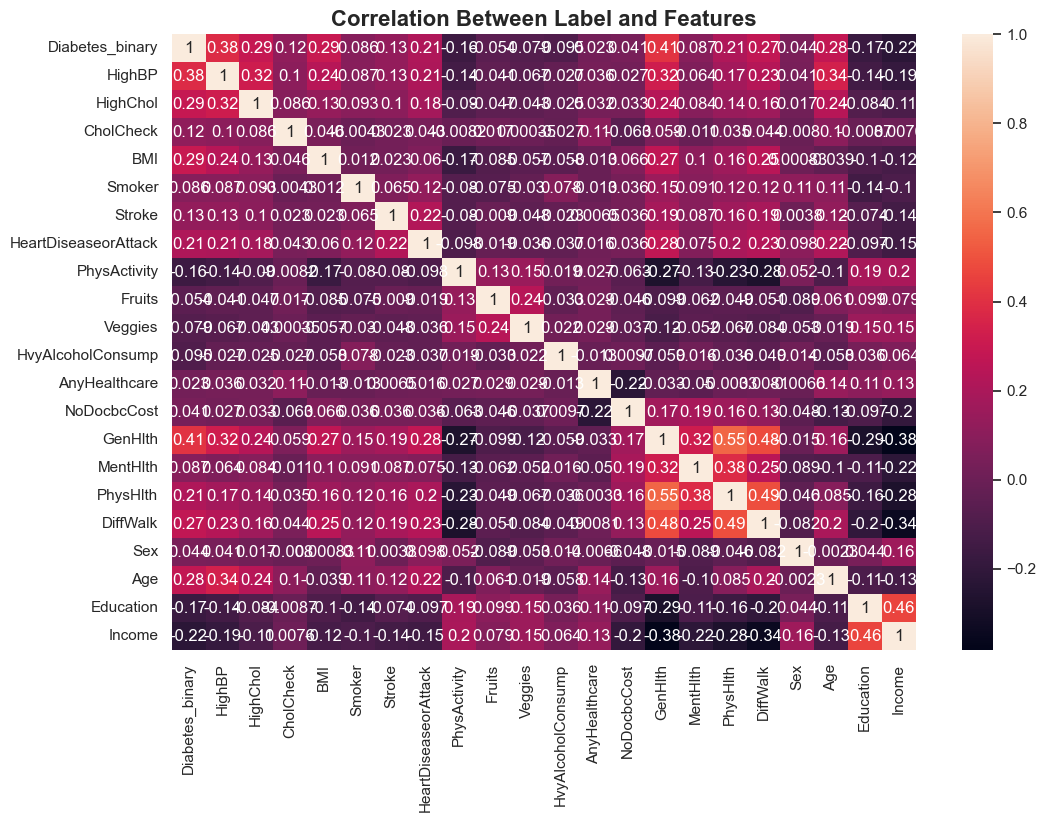

In [22]:
#plot a heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data=corr, annot=True)
plt.title("Correlation Between Label and Features", fontsize=16, fontweight="bold")
plt.show()

In [26]:
diabetes_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [28]:
diabetes_df = diabetes_df.drop(["Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "MentHlth", "Sex", "Smoker"], axis=1)

In [29]:
diabetes_df = diabetes_df.drop("PhysHlth", axis=1)

In [32]:
#check changes
print(f"The dataframe now contains {diabetes_df.shape[1]} columns.")
print("Column names: \n", diabetes_df.columns)

The dataframe now contains 13 columns.
Column names: 
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'DiffWalk', 'Age',
       'Education', 'Income'],
      dtype='object')


In [33]:
#inspect class distribution
diabetes_dist = diabetes_df.groupby('Diabetes_binary').size()
diabetes_dist

Diabetes_binary
0    35346
1    35346
dtype: int64

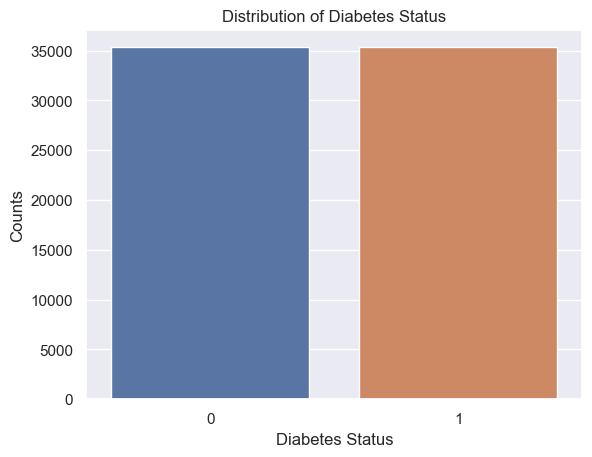

In [34]:
#plot the class distribution
sns.barplot(x=diabetes_dist.index, y=diabetes_dist.values)
plt.title("Distribution of Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Counts")
plt.show()

In [35]:
#define a dictionary to map the numerical values of the target varaible to the class name
#Class 0 is No Diabetes and Class 1 is Diabetes
classNames = {0: "No Diabetes", 1: "Diabetes"}

## Data Preprocessing

#### Split Data (Features Matrix and Target Array)

In [36]:
#split dataframe into features and target
X = diabetes_df.drop("Diabetes_binary", axis=1)
y = diabetes_df['Diabetes_binary']

In [53]:
#check first 5 rows of the features matrix and target array
display(X.head(), y.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: category
Categories (2, int64): [0, 1]

#### PCA Analysis

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance");

pca = PCA(n_components=8)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

#### Splitting Data into train and tests

In [37]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [38]:
#display the shape of train data
display(X_train.shape, y_train.shape)

(56553, 12)

(56553,)

In [39]:
#display the shape of test data
display(X_test.shape, y_test.shape)

(14139, 12)

(14139,)

#### Feature Scaling

In [40]:
#instantiating the standard scaler
scaler = StandardScaler() 

#fit scaler to the features train data
scaler.fit(X_train)

#transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Development

### Baseline model

In [41]:
#build the model
baseline_model = LogisticRegression()

#fit the model 
baseline_model.fit(X_train,y_train)

LogisticRegression()

In [42]:
#predict on test data
y_predict = baseline_model.predict(X_test)

In [43]:
#check accuracy
accuracy= accuracy_score(y_test, y_predict)
print(f"Baseline accuracy is: {accuracy * 100:.2f}%")

Baseline accuracy is: 74.45%


### Model One: Decision Tree Classifier

In [44]:
#build model one
modelOne = DecisionTreeClassifier()

#fit model one on train data
modelOne.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
#predict on test data
y_pred1 = modelOne.predict(X_test)

In [46]:
#check accuracy
accuracy= accuracy_score(y_test, y_pred1)
print(f"Model One accuracy is: {accuracy * 100:.2f}%")

Model One accuracy is: 66.40%


# Use 5-fold split
kf = KFold(5,shuffle=True)

fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, validate_index in kf.split(X,y):
    modelOne.fit(X.iloc[train_index],y.iloc[train_index])
    y_test = y[validate_index]
    y_pred = modelOne.predict(X.iloc[validate_index])
    #print(y_test)
    #print(y_pred)
    #print(f"Fold #{fold}, Training Size: {len(trainDF)}, Validation Size: {len(validateDF)}")
    print(f"Fold #{fold}, Training Size: {len(X.iloc[train_index])}, Validation Size: {len(X.iloc[validate_index])}")
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    fold += 1

In [47]:
# Define the hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None]
}

#set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(modelOne, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

#fit the grid search on the training data
grid_search.fit(X_train, y_train)

#extract the best estimator (tuned model)
modelOneTuned = grid_search.best_estimator_

#print the best parameters and score for reference
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 30}
Best cross-validated accuracy: 0.740526667428036


In [48]:
#get predictions
y_pred12 = modelOneTuned.predict(X_test)
y_pred12

array([1, 0, 1, ..., 1, 1, 0])

In [49]:
#check accuracy
accuracy= accuracy_score(y_test, y_pred12)
print(f"Model One Tuned accuracy is: {accuracy * 100:.2f}%")

Model One Tuned accuracy is: 73.92%


### Model Two: SVM Classifier

In [50]:
#build the model
modelTwo = SVC()

#fit the model
modelTwo.fit(X_train, y_train)

SVC()

In [51]:
#get prediction
y_pred2 = modelTwo.predict(X_test)
y_pred2

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
#check accuracy
accuracy= accuracy_score(y_test, y_pred2)
print(f"Model Two accuracy is: {accuracy * 100:.2f}%")

Model Two accuracy is: 74.50%


In [53]:
modelTwoTuned = SVC(kernel='linear', C=10)
#fit the model
modelTwoTuned.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [54]:
#get prediction
y_pred22 = modelTwoTuned.predict(X_test)
y_pred22

array([1, 0, 1, ..., 1, 1, 0])

In [55]:
#check accuracy
accuracy= accuracy_score(y_test, y_pred22)
print(f"Model Two Tuned accuracy is: {accuracy * 100:.2f}%")

Model Two Tuned accuracy is: 74.24%


In [57]:
pip install tensorflow


                                              0.0/390.2 MB ? eta -:--:--
                                              0.1/390.2 MB 3.2 MB/s eta 0:02:02
                                              0.2/390.2 MB 3.1 MB/s eta 0:02:08
                                              0.3/390.2 MB 2.5 MB/s eta 0:02:36
                                              0.4/390.2 MB 2.4 MB/s eta 0:02:44
                                              0.4/390.2 MB 2.4 MB/s eta 0:02:44
                                              0.6/390.2 MB 2.2 MB/s eta 0:03:01
                                              0.7/390.2 MB 2.4 MB/s eta 0:02:43
                                              0.7/390.2 MB 2.1 MB/s eta 0:03:07
                                              0.8/390.2 MB 1.9 MB/s eta 0:03:22
                                              0.9/390.2 MB 2.0 MB/s eta 0:03:17
                                              1.1/390.2 MB 2.2 MB/s eta 0:03:00
                                              

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\uchechukwu\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



     -                                       14.1/390.2 MB 1.8 MB/s eta 0:03:25
     -                                       14.2/390.2 MB 1.8 MB/s eta 0:03:26
     -                                       14.3/390.2 MB 1.8 MB/s eta 0:03:25
     -                                       14.4/390.2 MB 1.8 MB/s eta 0:03:26
     -                                       14.4/390.2 MB 1.8 MB/s eta 0:03:26
     -                                       14.5/390.2 MB 1.8 MB/s eta 0:03:28
     -                                       14.7/390.2 MB 1.8 MB/s eta 0:03:25
     -                                       14.8/390.2 MB 1.8 MB/s eta 0:03:26
     -                                       14.9/390.2 MB 1.8 MB/s eta 0:03:26
     -                                       15.1/390.2 MB 1.8 MB/s eta 0:03:24
     -                                       15.1/390.2 MB 1.8 MB/s eta 0:03:24
     -                                       15.3/390.2 MB 1.9 MB/s eta 0:03:16
     -                                  

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ImportError: Traceback (most recent call last):
  File "C:\Users\uchechukwu\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [2]:
pip uninstall tensorflow tensorflow-intel
pip install tensorflow-cpu

SyntaxError: invalid syntax (915240518.py, line 1)